In [29]:
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
# sns.set_context("paper")
sns.set_context('talk')
sns.set()
%matplotlib inline

In [6]:
# Constants
itow = json.load(open('../data/coco/cocotalk.json', 'r'))['ix_to_word']
WORDS = {int(k): v for k, v in itow.items()}
if 0 not in WORDS:
    WORDS[0] = 'EOS'
MATCH = {v: k for k,v in WORDS.items()}
del itow

In [7]:
vocab = {}
with open('../data/Glove/CooC/vocab', 'r') as f:
    e = 1
    for line in f.readlines():
        vocab[e] = line.split()[0]
        e += 1

In [8]:
gmatch = {}
for i, gw in vocab.items():
    if gw in MATCH:
        # word in coco
        gmatch[i] = MATCH[gw]

In [67]:
CooC10 = np.zeros((len(WORDS), len(WORDS)))
print('Cooc matrix of size', CooC10.shape)
with open('../data/Glove/CooC/cooccurences.10.txt', 'r') as f:
    for line in f.readlines():
        w1, w2, c = line.split(',')
        w1 = int(w1)
        w2 = int(w2)
        if w1 in gmatch and w2 in gmatch:
            c = float(c)
            CooC10[gmatch[w1], gmatch[w2]] = c
pickle.dump(np.float32(CooC10), open("../data/coco/clean_coocurrencs10_coco.pkl", 'wb'))

Cooc matrix of size (9488, 9488)


In [55]:
CooC10[:,0] = 1
CooC10[:,-1] = 1
CooC10[0] = 1
CooC10[-1] = 1

In [56]:
# Divise by row sum to get Pij
CooC10 = CooC10/CooC10.sum(axis=1, keepdims=True)

In [57]:
CooC10 = np.clip(CooC10, 1e-40, 1)

In [60]:
CooC10 = np.log(CooC10)

In [63]:
print('max:', np.max(CooC10), "min:", np.min(CooC10))

max: 0.0 min: -92.1034037198


In [59]:
print('Diag min:', np.min(np.diag(CooC10)),' max:', np.max(np.diag(CooC10)))

Diag min: 1e-40  max: 0.583834523549


In [61]:
for i in range(len(CooC10)):
    CooC10[i,i] = 0 

In [62]:
CooC10[-1]

array([-9.15778312, -9.15778312, -9.15778312, ..., -9.15778312,
       -9.15778312,  0.        ])

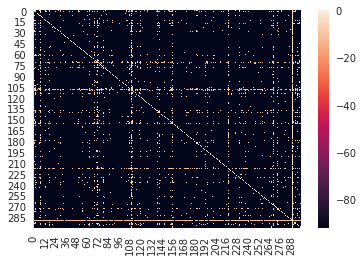

In [65]:
sns.set()
sns.heatmap(CooC10[:300, :300], vmax=0)


In [66]:
pickle.dump(np.float32(CooC10), open("../data/coco/coocurrencs10_coco.pkl", 'wb'))